<a href="https://colab.research.google.com/github/EisaacJC/ProgramacionCientificaFisUV/blob/main/classes/01_Clase_W3_Feb27_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Completar los siguientes campos y evaluar la celda

Titulo = 'Semana 27 feb, 2023' #@param {type:"string"}
Nombre = 'htapia' #@param {type:"string"}
Matricula = 'htapia' #@param {type:"string"}
Fecha = '2023-02-28' #@param {type:"date"}
print(Titulo)
print(Nombre)
print(Matricula)
print(Fecha)

Semana 27 feb, 2023
htapia
htapia
2023-02-28


## Rebote de una pelota cayendo al suelo
### Descripcion general del sistema. 
Hemos estudiado el movimiento de un objeto, una pelota, sujeta a la aceleracion debido a la gravedad cayendo verticalmente al suelo desde una altura determinada, a la cual llamamos $a$. Suponemos que en cada rebote la altura maxima que alcanza la pelota disminuye en un propocion $r$ de la altura anterior.

Determinamos que la distancia recorrida por la pelota en cada rebote puede separarse en una distancia hacia abajo y una distancia hacia arriba, enfocandonos en la distancia recorrida mientras la pelota cae, la cual denotamos por $d_n$, donde $n$ corresponde al movimeinto depues del $n$-esimo rebote con el suelo. La distancia recorrida en caida la obtenemos sumando las siguientes cantidades:

$$ d_k = a + a\cdot r + a\cdot r^2 + a\cdot r^3 + \cdots + a\cdot r^k, $$

y encontamos que la suma puede expresarse como $$ d_k=\frac{a}{1-r}(1-r^k)$$ valida si $r\neq 1$. En esta semana hemos desarrollado un par de algoritmos para calcular esta suma. Uno utiliza directamente esta expresion matematica, el otro utiliza un recursion.

## Metodo numerico
### Descripcion de la implementacion

El algoritmo A1 implementa la suma $$ d_k=\frac{a}{1-r}(1-r^k)$$ y puede expresarse como sigue:


```python
def d1(n,a,r):
    assert r!=1
    return a*(1-r**n)/(1-r)
``` 

El algoritmo A2 implementa la suma de manera recursiva:

```python
def d2(n,a,r):
    k=0
    sum=0
    while(k<n):
        sum = sum + a
        a = a*r
        k = k+1
    return sum
```

## Listado de codigo
### Incluir el codigo que se esta generando

El algoritmo A1 lo implementamos de la siguiente forma:

In [ ]:
def d1(n,a,r):
    try:
        assert r!=1, 'formula no valida para r=1'
    except AssertionError:
        print('formula no valida para r=1')
        raise 
    return a*(1-r**n)/(1-r)

a=20
r=8/10
n=10
d1(n,a,r)

89.26258176000002

El algoritmo A2 lo implementamos como sigue

In [ ]:
def d2(n,a,r):
    k=0
    sum=0
    while(k<n):
        sum = sum + a
        a = a*r
        k = k+1
    return sum
a=20
r=8/10
n=10
d2(n,a,r)

89.26258176

In [ ]:
# print rows with the values
a=20
r=8/10
[ [n, d1(n,a,r), d2(n,a,r)] for n in [10,50,100,500,1000] ]

[[10, 89.26258176000002, 89.26258176],
 [50, 99.99857275230731, 99.99857275230733],
 [100, 99.99999997962966, 99.99999997962966],
 [500, 100.00000000000003, 100.0],
 [1000, 100.00000000000003, 100.0]]

## Visualizacion de los resultados
### Incluir imagenes, graficas y demas recursos de visualizacion 

En esta seccion vamos a completar el modelo fisico de la pelota cayendo que comenzamos a trabajar hace una semana. El siguiente codigo modela la pelota cayendo desde una altura $a=20$ metros sujeto a una aceleracion constante $\vec{a}=(0,-9.81,0)\frac{m}{s^2}$. La simulacion calcula la trayectoria de la pelota por $t=5s$ en intervalos temporales (pasos de tiempo) de $dt=0.01s$. El suelo se supone esta localizado en el origen del sistema de coordenadas y esta representado por el plano azul en la simulacion. El siguiente codigo visualiza la trajectoria durante todo el intervalo temporal. Noten como la pelota pasa por encima del plano que representa el suelo. Necesitamos modificar el codigo para tomar en cuanta la presencia del piso y actuar cuando se encuentre. 

```python
scene = canvas(title='''Introduccion a la simulacion de objetos fisicos.
Masa en movimiento: aceleracion constante''')
scene.background=color.black

a=20 # metros
masa = sphere(pos=vector(0,a,0), radius=1., color=color.green)
piso = box(pos=vector(0,0,0),size=vector(14,0.2,4),color=color.blue)

t=0
dt=0.1
masa.a=vector(0,-9.81,0) # aceleracion constante en direccion vertical en unidades de m/s^2
masa.v=vector(0,0,0)

while(t<5):
    rate(100)
    # update velocity
    masa.v = masa.v + masa.a*dt
    # update position
    masa.pos = masa.pos + masa.v*dt
    # update time
    t = t+dt
```

In [ ]:
%%html

<iframe src="https://trinket.io/embed/glowscript/5bb30d8841?toggleCode=true" width="100%" height="600" frameborder="0" marginwidth="0" marginheight="0" allowfullscreen></iframe>


In [3]:
data=[[0.01, 19.999, -0.0981], [0.02, 19.9971, -0.1962], [0.03, 19.9941, -0.2943], [0.04, 19.9902, -0.3924], [0.05, 19.9853, -0.4905], [0.06, 19.9794, -0.5886], [0.07, 19.9725, -0.6867], [0.08, 19.9647, -0.7848], [0.09, 19.9559, -0.8829], [0.1, 19.946, -0.981], [0.11, 19.9353, -1.0791], [0.12, 19.9235, -1.1772], [0.13, 19.9107, -1.2753], [0.14, 19.897, -1.3734], [0.15, 19.8823, -1.4715], [0.16, 19.8666, -1.5696], [0.17, 19.8499, -1.6677], [0.18, 19.8322, -1.7658], [0.19, 19.8136, -1.8639], [0.2, 19.794, -1.962], [0.21, 19.7734, -2.0601]]


In [8]:
t,y,vy=list(zip(*data))

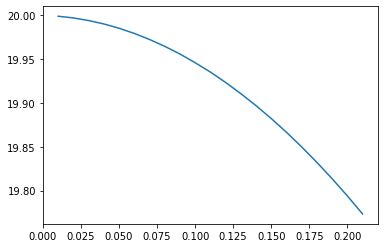

In [11]:
import matplotlib.pyplot as plt

plt.plot(t,y)

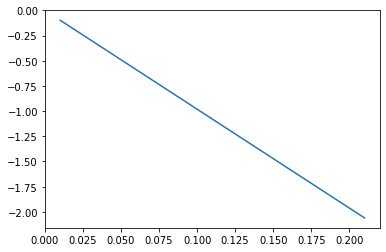

In [12]:
plt.plot(t,vy)

In [ ]:
# codigo de vpython si lo tienen localmente instalado pueden ejecutarlo
from vpython import *Web VPython 3.2

# codigo de vpython si lo tienen localmente instalado pueden ejecutarlo
# from vpython import *

scene = canvas(title='''Introduccion a la simulacion de objetos fisicos.
Masa en movimiento: aceleracion constante''', align='left')
scene.background=color.black
g1 = graph(xtitle='t[s]', ytitle='y[m]', width=500, height=150, align='left')
fp = gcurve(color=color.blue)
 
g2 = graph(xtitle='t[s]', ytitle='vy[m/s]', width=500, height=150, align='left')
fv = gcurve(color=color.red)

h = 20
r = 0.5
g = 9.81 
tc = sqrt(2*h/g)
masa = sphere(pos=vector(0,h,0), radius=r, color=color.yellow, make_trail=True, trail_type='points', interval=10, retain=10)
piso = box(pos=vector(0,0-r,0),size=vector(14,0.2,4),color=color.white)

t = 0
dt = 0.01
masa.a = vector(0,-g,0)
masa.v = vector(0,0,0)
masa.pos = masa.pos + masa.v*dt

data = []

while(t<6*tc):
    rate(100)
    # check collision
    if masa.pos.y < piso.pos.y + 0.5*masa.radius:
      masa.v.y = -masa.v.y
    # update velocity
    masa.v = masa.v + masa.a*dt
    # update position
    masa.pos = masa.pos + masa.v*dt
    # plot handle
    fp.plot(t, masa.pos.y)
    fv.plot(t, masa.v.y)
    # update time
    t = t+dt
    # print([t, masa.pos.y, masa.v.y])
    data.append([t,masa.pos.y,masa.v.y])
print(data)
#download("data.txt", data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Discusion
### Incluir una discusion de los resultados obtenidos

## Critica
### Critica o comentarios sobre el metodo y las herramientas